## NCP_Final_Model

In [1]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

In [2]:
 # Algorithms
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LogisticRegression

In [3]:
# Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#Cross Validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Searching
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [4]:
# Visualization
import plotly as plot
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score,mean_squared_error
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

In [5]:
data = pd.read_csv("New_Dataset_Gender_Height_Weight_Age_Calories.csv")

In [6]:
x = data.iloc[:,:4]
y = data.iloc[:,4]

In [7]:
# Feature scalling
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [8]:
# Classifier score dict 
base_scores_dict = {}
scores_dict = {}

#############################################################################################################################

## Base Models

In [9]:
# AdaBoost  Svr
b_svr=SVR()
b_svr_s = cross_val_score(b_svr,x,y, cv=5);
b_svr_results=np.average(b_svr_s) ;
print(b_svr_s)
print(b_svr_results)

[0.29125931 0.03191764 0.26457462 0.43008764 0.56471804]
0.3165114488589619


In [10]:
base_scores_dict['SVR'] =b_svr_results
b_svr_results

0.3165114488589619

In [11]:
# AdaBoost Rf
b_rf= RandomForestRegressor()                                  
b_rf_s = cross_val_score(b_rf,x,y, cv=5);
b_rf_results=np.average(b_rf_s) ;
print(b_rf_s)
print(b_rf_results)

[0.27719335 0.61474688 0.64623929 0.72237713 0.74546128]
0.601203586168278


In [12]:
base_scores_dict['Rf'] = b_rf_results
b_rf_results

0.601203586168278

In [13]:
# AdaBoost XGB
b_xgb= XGBRegressor()  
b_xgb_s = cross_val_score(b_xgb ,x,y, cv=5);
b_xgb_results=np.average(b_xgb_s) ;
print(b_xgb_s)
print(b_xgb_results)

[0.32095131 0.43117001 0.46288598 0.67839531 0.81383806]
0.5414481339778263


In [14]:
base_scores_dict['XGB'] =b_xgb_results
b_xgb_results

0.5414481339778263

In [15]:
# AdaBoost GB
b_gb= GradientBoostingRegressor()
b_gb_s = cross_val_score(b_gb ,x,y, cv=5);
b_gb_results=np.average(b_gb_s) ;
print(b_gb_s)
print(b_gb_results)

[0.41487483 0.615253   0.59206516 0.69205036 0.88651667]
0.640152004384557


In [16]:
base_scores_dict['GB'] = b_gb_results
b_gb_results

0.640152004384557

In [17]:
# AdaBoost Linear
b_lin=LinearRegression()
b_lin_s = cross_val_score(b_lin ,x,y, cv=5);
b_lin_results=np.average(b_lin_s) ;
print(b_lin_s)
print(b_lin_results)

[0.22891175 0.6812667  0.65677186 0.60022752 0.85821989]
0.6050795446557475


In [18]:
base_scores_dict['Linear'] = b_lin_results
b_lin_results

0.6050795446557475

##############################################################################################################################

## Bagging and AdaBoost Models

In [19]:
# AdaBoost  Svr
svr=SVR(C=19,kernel='rbf')
svr_adb=AdaBoostRegressor(svr,loss='linear',learning_rate=0.1, n_estimators=100)
svr_s = cross_val_score(svr_adb,x,y, cv=5);
svr_results=np.average(svr_s) ;
print(svr_s)
print(svr_results)

[0.51179737 0.79119026 0.81856665 0.78874266 0.90802426]
0.7636642399293275


In [20]:
scores_dict['SVR_Adb'] =svr_results
svr_results

0.7636642399293275

In [21]:
# AdaBoost Rf
rf= RandomForestRegressor(max_depth=7, max_features='log2', n_estimators=1000)                   
rf_adb =AdaBoostRegressor(rf,learning_rate=0.1, n_estimators=9)                
rf_s = cross_val_score(rf_adb,x,y, cv=5);
rf_results=np.average(rf_s) ;
print(rf_s)
print(rf_results)

[0.51880519 0.65330554 0.70627501 0.76389695 0.87470409]
0.703397355879954


In [22]:
scores_dict['Rf_Adb'] = rf_results
rf_results

0.703397355879954

In [23]:
# AdaBoost XGB
xgb= XGBRegressor(alpha=30, booster='gbtree', gamma =0.01, n_estimators=15)  
xgb_adb = AdaBoostRegressor(n_estimators=1, learning_rate=0.30000000000000004)
xgb_s = cross_val_score(xgb ,x,y, cv=5);
xgb_results=np.average(xgb_s);
print(xgb_s)
print(xgb_results)

[0.54336707 0.59423406 0.63853434 0.74425944 0.85316057]
0.6747110970983308


In [24]:
scores_dict['XGB_Adb'] =xgb_results
xgb_results

0.6747110970983308

In [25]:
# AdaBoost GB
gb= GradientBoostingRegressor(loss='lad', max_features='log2')
gb_adb = AdaBoostRegressor(n_estimators=7, learning_rate=0.1)
gb_s = cross_val_score(gb ,x,y, cv=5);
gb_results=np.average(gb_s) ;
print(gb_s)
print(gb_results)

[0.4972986  0.71813387 0.69198935 0.74518006 0.90152889]
0.7108261548928891


In [26]:
scores_dict['GB_Adb'] = gb_results
gb_results

0.7108261548928891

In [27]:
# AdaBoost Linear
lin=LinearRegression(normalize=True,)
lin_adb=AdaBoostRegressor(lin,loss='linear', n_estimators=5) 
lin_s = cross_val_score(lin_adb ,x,y, cv=5);
lin_results=np.average(lin_s) ;
print(lin_s)
print(lin_results)

[0.26218729 0.66146736 0.64225249 0.5901676  0.84423125]
0.6000611976801327


In [28]:
scores_dict['Lin_Adb'] = lin_results
lin_results

0.6000611976801327

In [29]:
# Base Voting
b_vot = VotingRegressor([('b_svr',b_svr),('b_rf',b_rf),('b_xgb',b_xgb),('b_gb',b_gb),('b_lin',b_lin)]) #,('adb_xgb',adb_xgb)
s_b_vot = cross_val_score(b_vot,x,y, cv=5);
b_vot_results=np.average(s_b_vot);
print(s_b_vot)
print(b_vot_results)

[0.4601346  0.64465472 0.6635086  0.71809937 0.86564001]
0.6704074601733647


In [30]:
base_scores_dict['Voting'] = b_vot_results
b_vot_results

0.6704074601733647

In [31]:
# Optimized voting
o_vot = VotingRegressor([('svr_adb',svr_adb),('rf_adb',rf_adb),('xgb',xgb),('gb',gb),('lin_adb',lin_adb)]) #,('adb_xgb',adb_xgb)
s_o_vot = cross_val_score(o_vot,x,y, cv=5);
o_vot_results=np.average(s_o_vot);
print(s_o_vot)
print(o_vot_results)

[0.54181536 0.73082769 0.74542965 0.77018458 0.90554252]
0.7387599621162566


In [32]:
scores_dict['Voting'] =o_vot_results
o_vot_results

0.7387599621162566

In [33]:
print("Optimized_Voting :", o_vot_results)
print()
print("Bagging Boost")
print("svr_Adb :",svr_results)
print("rf_Adb :",rf_results)
print("xgb_Adb :",xgb_results)
print("gb_Adb :",gb_results)
print("linear_Adb :",lin_results)
print("Base_Voting :", b_vot_results)
print()
print("Base_Voting :", b_vot_results)
print("Base Model")
print("svr :",b_svr_results)
print("rf :",b_rf_results)
print("xgb :",b_xgb_results)
print("gb :",b_gb_results)
print("linear :",b_lin_results)


Optimized_Voting : 0.7387599621162566

Bagging Boost
svr_Adb : 0.7636642399293275
rf_Adb : 0.703397355879954
xgb_Adb : 0.6747110970983308
gb_Adb : 0.7108261548928891
linear_Adb : 0.6000611976801327
Base_Voting : 0.6704074601733647

Base_Voting : 0.6704074601733647
Base Model
svr : 0.3165114488589619
rf : 0.601203586168278
xgb : 0.5414481339778263
gb : 0.640152004384557
linear : 0.6050795446557475


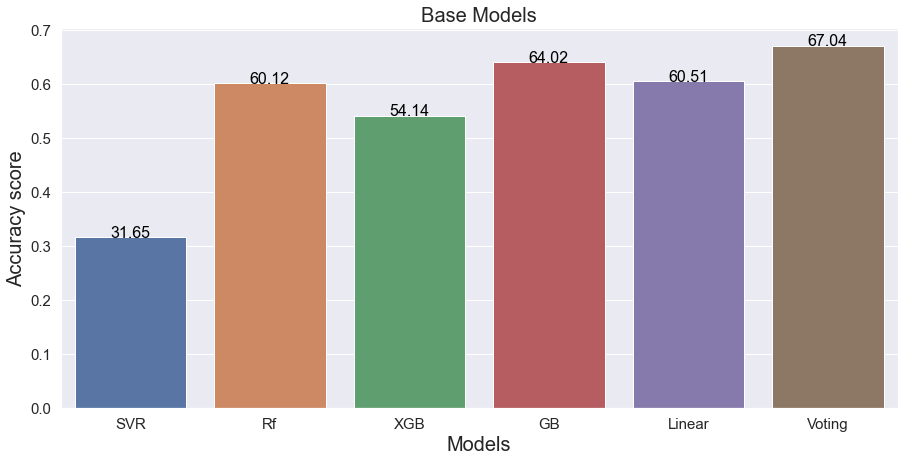

In [34]:
import seaborn as sns

with sns.color_palette('muted'):
  algo_name = list(base_scores_dict.keys())
  scores = list(base_scores_dict.values())
  #sns.color_palette("Greens_d", len(dataset))
  # deep , light winter spring
  sns.set(rc={'figure.figsize':(15,7)})
  plt.xlabel("Models",fontsize=20)
  plt.ylabel("Accuracy score",fontsize=20)
  plt.title("Base Models",fontsize=20)
  plt.tick_params(labelsize=15) 
  bs=sns.barplot(x=algo_name,y=scores)
  for idx, val in enumerate(scores):
    bs.text(idx,val, round(scores[idx]*100,2), color='black', ha="center",fontsize=16)
  plt.show()

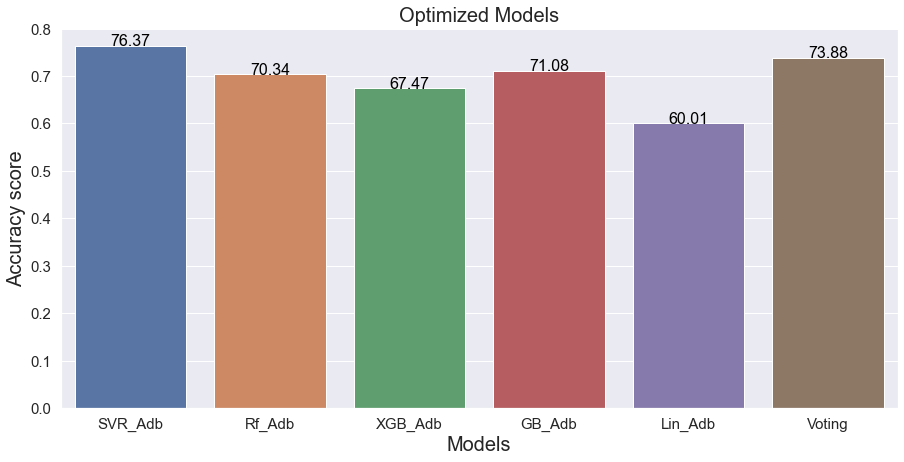

In [35]:
import seaborn as sns

with sns.color_palette('muted'):
  algo_name = list(scores_dict.keys())
  scores = list(scores_dict.values())
  #sns.color_palette("Greens_d", len(dataset))
  # deep , light winter spring
  sns.set(rc={'figure.figsize':(15,7)})
  plt.xlabel("Models",fontsize=20)
  plt.ylabel("Accuracy score",fontsize=20)
  plt.title("Optimized Models",fontsize=20)
  plt.tick_params(labelsize=15) 
  s=sns.barplot(x=algo_name,y=scores)
  for idx, val in enumerate(scores):
    s.text(idx,val, round(scores[idx]*100,2), color='black', ha="center",fontsize=16)
    
  plt.show()  

### Model Selection

In [36]:
# Best voting config

In [37]:
vot_scores_dict = {}

In [38]:
vot1 = VotingRegressor([('svr_adb',svr_adb),('xgb',xgb),('gb',gb),('lin_adb',lin_adb)]) #,('adb_xgb',adb_xgb) ('rf_adb',rf_adb),('xgb',xgb),('gb',gb),
cvot1= cross_val_score(vot1,x,y, cv=5);
vot1_results=np.average(cvot1);
print(cvot1)
print(vot1_results)

[0.52975929 0.74385016 0.76312705 0.76925253 0.91823694]
0.7448451936097277


In [39]:
vot_scores_dict['Voting_1'] = vot1_results
vot1_results

0.7448451936097277

In [40]:
vot2 = VotingRegressor([('svr_adb',svr_adb), ('rf_adb',rf_adb)]) #,('adb_xgb',adb_xgb) ('rf_adb',rf_adb),('xgb',xgb),('gb',gb),
cvot2= cross_val_score(vot2,x,y, cv=5);
vot2_results=np.average(cvot2);
print(cvot2)
print(vot2_results)

[0.53844521 0.74329177 0.79072077 0.78376818 0.90397263]
0.7520397143466081


In [41]:
vot_scores_dict['Voting_2'] = vot1_results
vot1_results

0.7448451936097277

In [42]:
vot3 = VotingRegressor([('svr_adb',svr_adb),('xgb',xgb)]) 
cvot3= cross_val_score(vot3,x,y, cv=5);
vot3_results=np.average(cvot3);
print(cvot3)
print(vot3_results)

[0.5501538  0.72201608 0.76861443 0.80182806 0.90371117]
0.7492647074722629


In [43]:
vot_scores_dict['Voting_3'] = vot1_results
vot1_results

0.7448451936097277

In [44]:
vot5 = VotingRegressor([('svr_adb',svr_adb),('rf_adb',rf_adb),('gb',gb)]) 
cvot5= cross_val_score(vot5,x,y, cv=5);
vot5_results=np.average(cvot5);
print(cvot5)
print(vot5_results)

[0.54502665 0.74961058 0.77503486 0.77722869 0.90540556]
0.7504612689648235


In [45]:
vot_scores_dict['Voting_4'] = vot1_results
vot1_results

0.7448451936097277

In [46]:
vot4 = VotingRegressor([('svr_adb',svr_adb),('gb',gb)]) 
cvot4= cross_val_score(vot4,x,y, cv=5);
vot4_results=np.average(cvot4);
print(cvot4)
print(vot4_results)

[0.53465124 0.77753087 0.81324559 0.78951626 0.91396103]
0.7657809973992296


In [47]:
vot_scores_dict['Voting_5'] = vot1_results
vot1_results


0.7448451936097277

In [48]:
svr1=SVR(C=16,kernel='rbf')
svr2=SVR(C=17,kernel='poly')
svr3=SVR(C=18,kernel='linear')
svr4=SVR(C=19,kernel='rbf')
svr5=SVR(C=20,kernel='rbf')
svr1_adb=AdaBoostRegressor(svr1,loss='linear',learning_rate=0.1, n_estimators=100)
svr2_adb=AdaBoostRegressor(svr2,loss='linear',learning_rate=0.1, n_estimators=100)
svr3_adb=AdaBoostRegressor(svr3,loss='linear',learning_rate=0.1, n_estimators=100)
svr4_adb=AdaBoostRegressor(svr4,loss='linear',learning_rate=0.1, n_estimators=100)
svr5_adb=AdaBoostRegressor(svr5,loss='linear',learning_rate=0.1, n_estimators=100)

evr = VotingRegressor([('svr1_adb',svr1_adb),('svr2_adb',svr2_adb),('svr3_adb',svr3_adb),('svr4_adb',svr4_adb),('svr5_adb',svr5_adb)]) 
evr_s= cross_val_score(evr,x,y, cv=5);
evr_results=np.average(evr_s);
print(evr_s)
print(evr_results)


[0.5108027  0.8103124  0.80282061 0.78550243 0.91238432]
0.7643644934910622


In [49]:
vot_scores_dict['SVR_Voting'] =evr_results
evr_results

0.7643644934910622

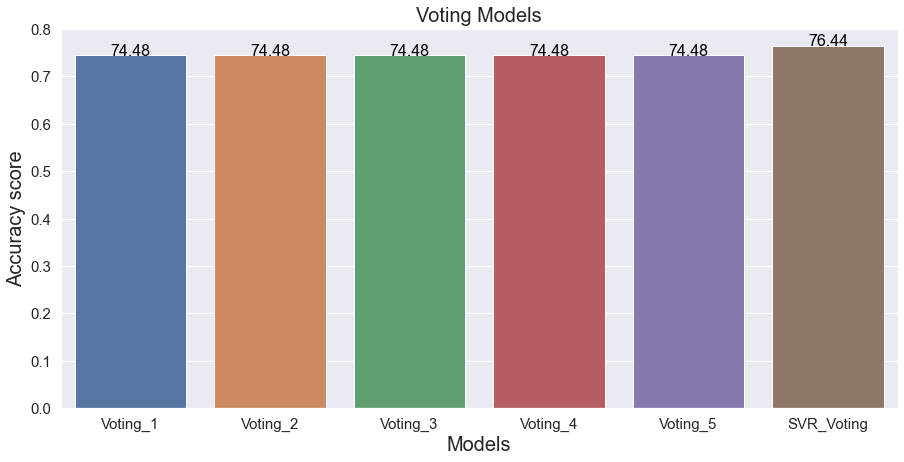

In [50]:
with sns.color_palette('muted'):
  algo_name = list(vot_scores_dict.keys())
  scores = list(vot_scores_dict.values())
  #sns.color_palette("Greens_d", len(dataset))
  # deep , light winter spring
  sns.set(rc={'figure.figsize':(15,7)})
  plt.xlabel("Models",fontsize=20)
  plt.ylabel("Accuracy score",fontsize=20)
  plt.title("Voting Models",fontsize=20)
  plt.tick_params(labelsize=15) 
  s=sns.barplot(x=algo_name,y=scores)
  for idx, val in enumerate(scores):
    s.text(idx,val, round(scores[idx]*100,2), color='black', ha="center",fontsize=16)
    
  plt.show() 

In [ ]:
# save the model to disk
#fileName='FinalModel.sav'
#pickle.dump(evc,open(fileName,'wb'))

In [ ]:
# save the model to disk
#fileName='FinalModel.pkl'
#pickle.dump(evc,open(fileName,'wb'))

In [ ]:
# load the model from disk
#fileName='FinalModel.sav'
#loaded_model=pickle.load(open(fileName,'rb'))

In [ ]:
# load the model from disk
#fileName='FinalModel.pkl'
#loaded_model=pickle.load(open(fileName,'rb'))